# rainfall Prediction Using Linear Regression
Rainfall Prediction is the application of science and technology to predict the amount of rainfall over a region. It is important to exactly determine the rainfall for effective use of water resources, crop productivity and pre-planning of water structures.

Data comes in all forms, most of it being very messy and unstructured. They rarely come ready to use. Datasets, large and small, come with a variety of issues- invalid fields, missing and additional values, and values that are in forms different from the one we require. In order to bring it to workable or structured form, we need to “clean” our data, and make it ready to use. Some common cleaning includes parsing, converting to one-hot, removing unnecessary data, etc.

In our case, our data has some days where some factors weren’t recorded. And the rainfall in cm was marked as T if there was trace precipitation. Our algorithm requires numbers, so we can’t work with alphabets popping up in our data. so we need to clean the data before applying it on our model

Cleaning the data in Python:

In [45]:
# importing libraries
import pandas as pd
import numpy as np
  
# read the data in a pandas dataframe
data = pd.read_csv("weather.csv")
  
# drop or delete the unnecessary columns in the data.
data = data.drop(['Events', 'Date', 'SeaLevelPressureHighInches', 
                  'SeaLevelPressureLowInches'], axis = 1)
  
# some values have 'T' which denotes trace rainfall
# we need to replace all occurrences of T with 0
# so that we can use the data in our model
data = data.replace('T', 0.0)
  
# the data also contains '-' which indicates no 
# or NIL. This means that data is not available
# we need to replace these values as well.
data = data.replace('-', 0.0)
  
# save the data in a csv file
data.to_csv('weather_final.csv')

In [46]:
# importing libraries
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [47]:
# read the cleaned data
data = pd.read_csv("weather_final.csv")

# the features or the 'x' values of the data
# these columns are used to train the model
# the last column, i.e, precipitation column
# will serve as the label
X = data.drop(['PrecipitationSumInches'], axis = 1)

# the output or the label.
Y = data['PrecipitationSumInches']
# reshaping it into a 2-D vector
Y = Y.values.reshape(-1, 1)

/usr/local/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The precipitation in inches for the input is: [[1.33868402]]
the precipitation trend graph: 


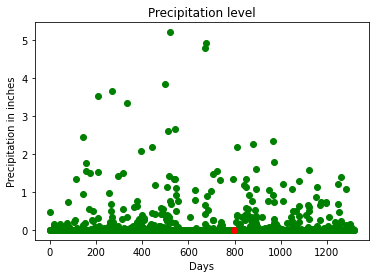

In [48]:
# consider a random day in the dataset
# we shall plot a graph and observe this day
day_index = 798
days = [i for i in range(Y.size)]

# initialize a linear regression classifier
clf = LinearRegression()
# train the classifier with our input data.
clf.fit(X, Y)

# give a sample input to test our model
# this is a 2-D vector that contains values for each column in the dataset.
test_data = np.array([[74], [60], [45], [67], [49], [43], [33], [45],
				[57], [29.68], [10], [7], [2], [0], [20], [4], [31]])
test_data = test_data.reshape(1, -1)
pred_data = clf.predict(test_data)
# print the output.
print('The precipitation in inches for the input is:', pred_data )

# plot a graph of the precipitation levels versus the total number of days.
# one day, which is in red, is tracked here. It has a precipitation of approx. 2 inches.
print("the precipitation trend graph: ")
plt.scatter(days, Y, color = 'g')
plt.scatter(days[day_index], Y[day_index], color ='r')
plt.title("Precipitation level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")
plt.show()


Precipitation vs selected attributes graph: 


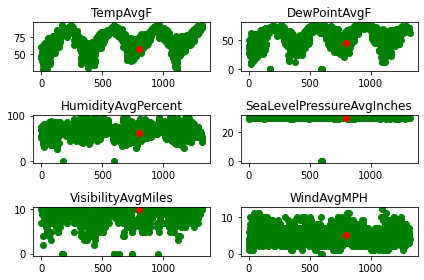

In [49]:
# plot a graph with a few features (x values) against the precipitation or rainfall to observe the trends

features = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
				'WindAvgMPH'], axis = 1)

print("Precipitation vs selected attributes graph: ")

for i in range(features.columns.size):
	plt.subplot(3, 2, i + 1)
	plt.scatter(days, features[features.columns.values[i][:100]], color = 'g')
	plt.scatter(days[day_index],
				features[features.columns.values[i]][day_index], color ='r')
	plt.title(features.columns.values[i])

plt.tight_layout()
plt.show()